# PREDICTING WINE TYPE

## OBJECTIVE

        1. Build a predictive model for predicting the wine “variety”. 
        
        2. DATA DESCRIPTION:
                •	user_name - user_name of the reviewer
                •	country -The country that the wine is from.
                •	review_title - The title of the wine review, which often contains the vintage.
                •	review_description - A verbose review of the wine.
                •	designation - The vineyard within the winery where the grapes that made the wine are from.
                •	points - ratings given by the user. The ratings are between 0 -100.
                •	price - The cost for a bottle of the wine
                •	province - The province or state that the wine is from.
                •	region_1 - The wine-growing area in a province or state (ie Napa).
                •	region_2 - Sometimes there are more specific regions specified within a wine-growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank.
                •	winery - The winery that made the wine
                •	variety - The type of grapes used to make the wine. Dependent variable for task 2 of the assignment


##### NOTE: Because of my system constraints, I could not process thw whole dataset with more than 70000 rows which is why I have taken a random sample for further text processing and predictions.

#### IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.metrics import classification_report

C:\Users\Dell Insp\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, defaultdict


In [2]:
train = pd.read_csv('train.csv')
df = train.copy()

In [3]:
df.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
user_name             63264 non-null object
country               82622 non-null object
review_title          82657 non-null object
review_description    82657 non-null object
designation           59010 non-null object
points                82657 non-null int64
price                 77088 non-null float64
province              82622 non-null object
region_1              69903 non-null object
region_2              35949 non-null object
winery                82657 non-null object
variety               82657 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 4.4+ MB


In [5]:
df.shape

(82657, 12)

In [6]:
col = ['country','province', 'region_1', 'region_2','winery','variety','designation']

EXTRACTING THE NUMBER OF UNIQUE VALUES AND THEIR FREQUENCIES IN EACH COLUMN OF THE DATAFRAME

In [7]:
for c in col:
    print(c)
    print(df[c].value_counts())
    print(df[c].nunique())
    print('\n')

country
US                38573
France            15948
Italy              9112
Portugal           3197
Chile              2891
Spain              2755
Argentina          2570
Austria            1892
Germany            1573
New Zealand        1121
Australia          1028
South Africa        727
Israel              320
Canada              176
Greece              139
Bulgaria             93
Romania              80
England              62
Slovenia             42
Mexico               38
Moldova              35
Hungary              35
Turkey               33
Uruguay              33
Brazil               28
Lebanon              28
Morocco              21
Croatia              12
Georgia              12
Ukraine              11
Peru                  8
Cyprus                6
Luxembourg            5
Macedonia             5
Switzerland           5
Serbia                4
Czech Republic        3
India                 1
Name: country, dtype: int64
38


province
California                   25736
Was

In [7]:
df.isnull().sum()

user_name             19393
country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                  5569
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
dtype: int64

DROPPING ALL THOSE COLUMNS THAT HAS DUPLICATE ROWS

In [8]:
df[df.duplicated('review_description',keep=False)].sort_values('review_description').shape

(10058, 12)

In [9]:
df.drop_duplicates(inplace = True)

In [11]:
df.columns

Index(['user_name', 'country', 'review_title', 'review_description',
       'designation', 'points', 'price', 'province', 'region_1', 'region_2',
       'winery', 'variety'],
      dtype='object')

DROPPING ALL THE COLUMNS THAT ARE NOT VERY USEFUL IN OUR ANALYSIS. WE ARE ONLY CONSIDERING PRICE, POINTS AND REVIEW DESCRIPTION COLUMNS FOR OUR ANALYSIS.

In [10]:
df.drop(['user_name','review_title','designation','province','region_1','region_2','winery'],axis=1,inplace=True)

DROPPING ALL THE NULL VALUES

In [11]:
df.isnull().sum()

country                 33
review_description       0
points                   0
price                 5285
variety                  0
dtype: int64

In [12]:
df.shape

(77641, 5)

In [13]:
df.dropna(inplace=True)

In [14]:
df.shape

(72327, 5)

WE CAN CLEARLY SEE FROM THE BELOW GRAPH THAT MOST OF THE REVIEWS CAME FROM US, FRANCE AND ITALY AND THERE WERE A LOT OF COUNTRIES LIKE INDIA, SERBIA, PERU, ETC FROM DID NOT CONTRIBUTE MUCH IN GIVING THE REVIEWS. 

THEREFORE, WE WILL DROP ALL THOSE COUNTRIES WHICH HAD LESS THAN 50 REVIEWS.

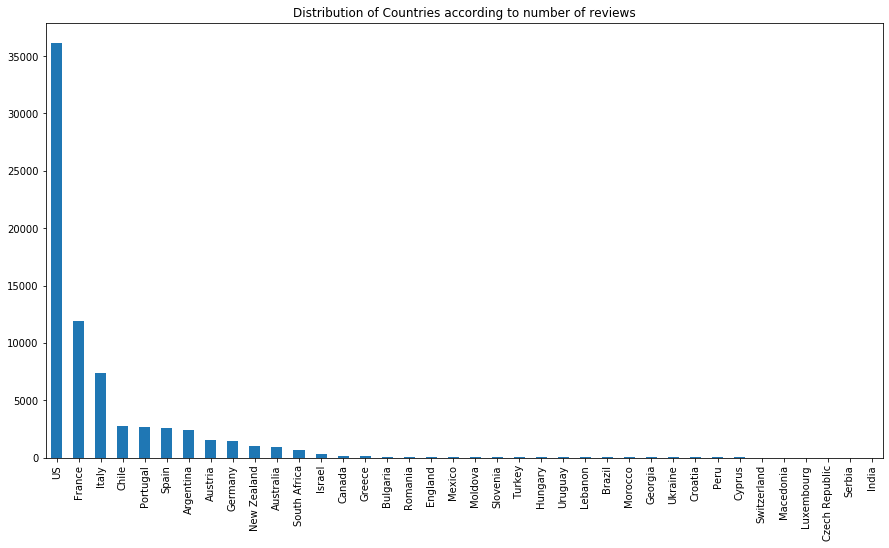

In [17]:
df['country'].value_counts().plot(kind = 'bar',figsize = (15,8),x = 'Countries', y = 'Frequency', title = 'Distribution of Countries according to number of reviews')

In [15]:
drop = ['Slovenia','Mexico','Moldova','Hungary','Turkey','Uruguay','Brazil','Lebanon','Morocco','Croatia','Ukraine','Georgia','Peru','Cyprus','Switzerland','Macedonia','Luxembourg','Serbia','Czech Republic','India']

In [16]:
subset = df[~df['country'].isin(drop)]
subset = subset.sample(18000)

In [11]:
subset.shape

(18000, 5)

In [21]:
subset.head(5)

,country,review_description,points,price,variety
55434,France,"A rich style of Chablis, with a toasty quality...",91,40.0,Chardonnay
27471,Austria,A complex blend that moves this wine into an i...,89,49.0,Red Blend
60644,France,This is the second wine from one of the group ...,90,35.0,Bordeaux-style Red Blend
45157,France,"Typically fresh and fruity, this strawberry-je...",85,13.0,Gamay
60570,Australia,Shows some rather lactic overtones to go with ...,83,15.0,Chardonnay


In [17]:
subset.isnull().sum()

country               0
review_description    0
points                0
price                 0
variety               0
dtype: int64

In [18]:
subset.dropna()

,country,review_description,points,price,variety
1925,US,"Sweet pea blossoms, stone fruits and red raspb...",89,18.0,Rosé
5775,Italy,"Forest floor, leather, pressed violet and bals...",90,70.0,Sangiovese
10942,US,"This is a soft, tart, light red wine with exce...",82,29.0,Red Blend
7902,Italy,Pajoré unfolds clearly identifiable notes of s...,90,55.0,Nebbiolo
46764,US,L'Ecole's Columbia Valley Cabernet is again 10...,92,32.0,Cabernet Sauvignon
...,...,...,...,...,...
16776,US,"Right now, the tannins are so fierce, they ove...",92,100.0,Cabernet Sauvignon
2512,US,"A bit lean in fruit, in keeping with this prob...",85,17.0,Merlot
35802,Austria,A nose of pure lemon zest also has the faintes...,94,41.0,Riesling
75115,US,This 100% Sauvignon Blanc has just a touch of ...,88,24.0,Sauvignon Blanc


In [24]:
subset.shape

(18000, 5)

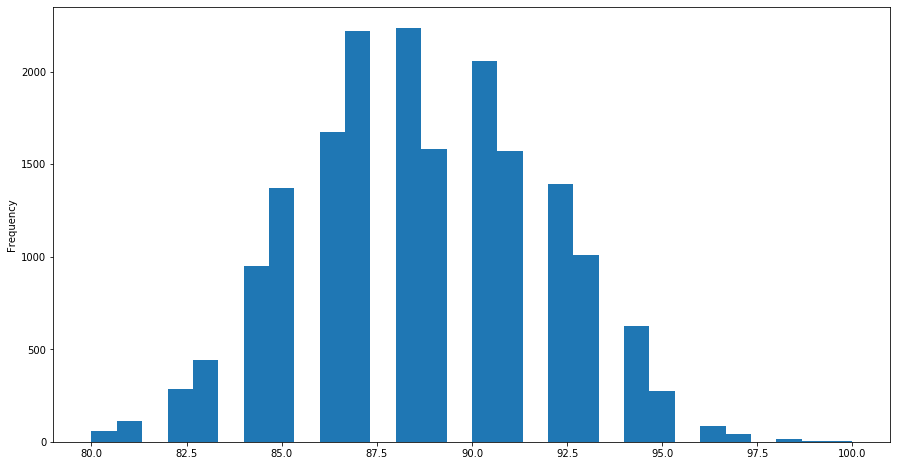

In [26]:
subset['points'].plot(kind = 'hist',bins = 30,figsize = (15,8))

WE CAN OBSERVE FROM THE BELOW SCATTERED GRAPH THAT AS THE POINTS OR RATINGS FOR THE VARIETY OF WINE INCREASES, THE DATA BECOMES MORE RANDOM AND PRICES KEEPS ON RISING.

WE CAN OBSERVE AT UPTO 90 POINTS, THE DATA POINTS WERE CONCENTRATED ON ONE VERTICAL LINE i.e. PRICES WERE INCREASING AT A CONSTANT RATE BUT AS THE POINTS INCREASES, THE PRICES OF THE WINES ARE BECOMING MORE EXTREME.

THIS IMPLIES THAT THE PRICE AND POINTS HAS SOME KIND OF DIRECT RELATIONSHIP BETWEEN THEM.

Text(0, 0.5, 'Price')

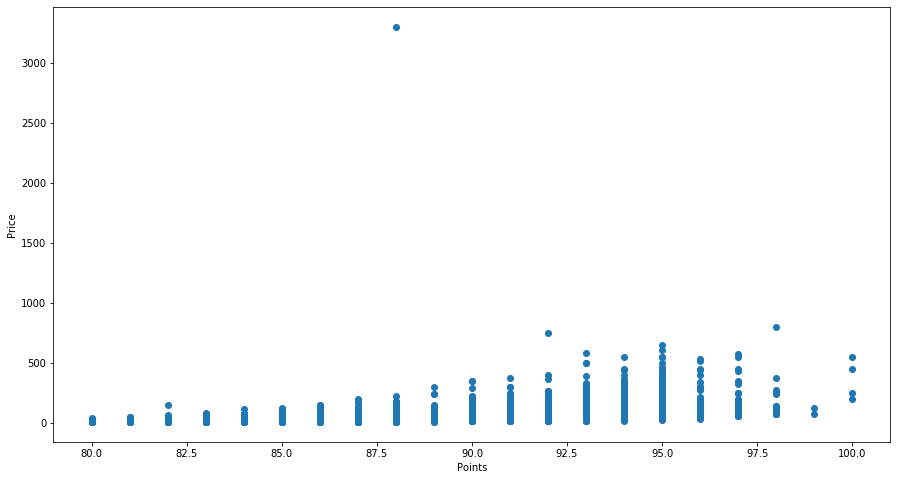

In [27]:
plt.figure(figsize = (15,8))
plt.scatter(x = subset['points'],y = subset['price'])
plt.xlabel('Points')
plt.ylabel('Price')

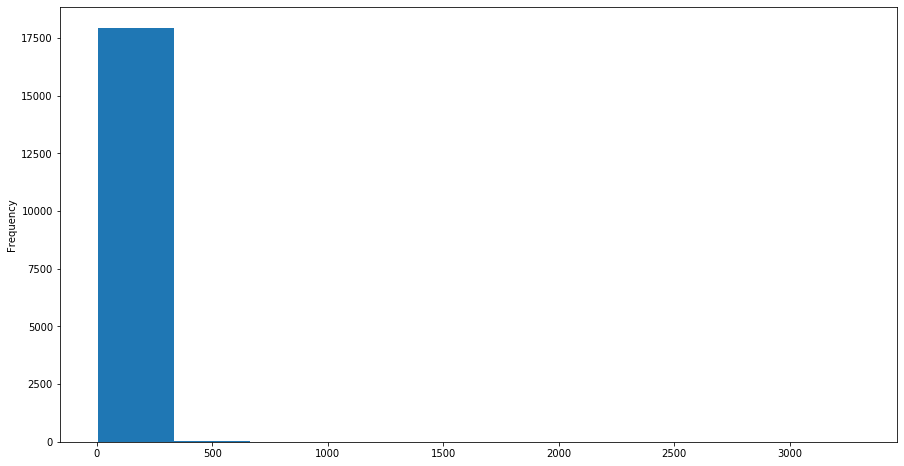

In [28]:
subset['price'].plot(kind = 'hist',bins = 10,figsize = (15,8))

NOW, WE ARE CALCULATING THE LENGTH OF ALL THE REVIEWS AND CHECKING IF THERE IS ANY RELATION BETWEEN THE LENGTH OF THE REVIEWS AND THE TYPES OF WINE..

In [13]:
subset['review length'] = subset['review_description'].apply(len)

In [30]:
subset['review length'].min()

24

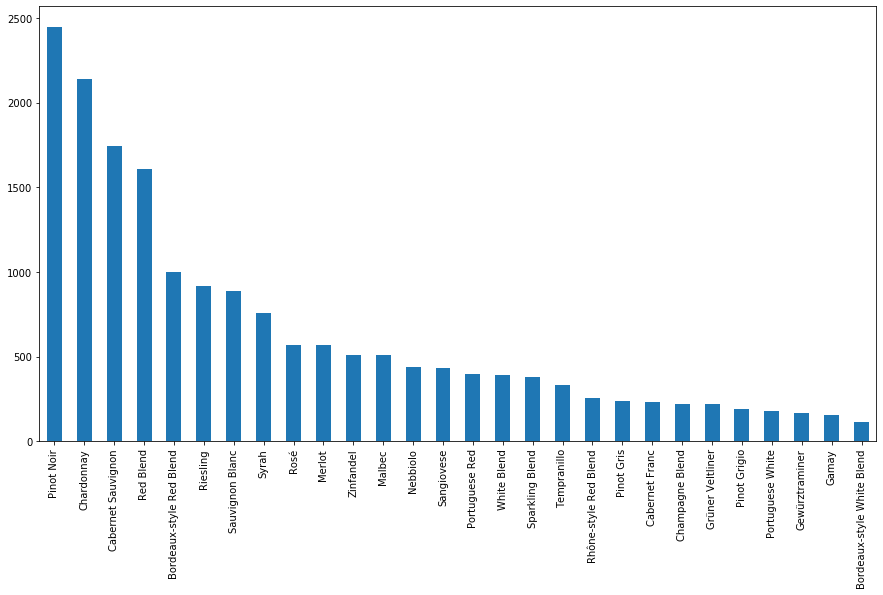

In [31]:
subset['variety'].value_counts().plot(kind = 'bar',figsize = (15,8))

FROM THE BELOW GRAPHS, WE CAN SEE THAT CHARDONNARY, RED BLEND, BORDEAUX-STYKE RED BLEND, PINOT NOIR AND CABERNET SAUVIGNON SEEMS TO BE THE MOST POPULAR WINE TYPE AS THEY REVIEWS OF HIGHEST LENGTHS AND ALSO BECAUSE THEY ARE SOLD AT A LOT OF PLACES AS SHOWN IN THE ABOVE GRAPH.

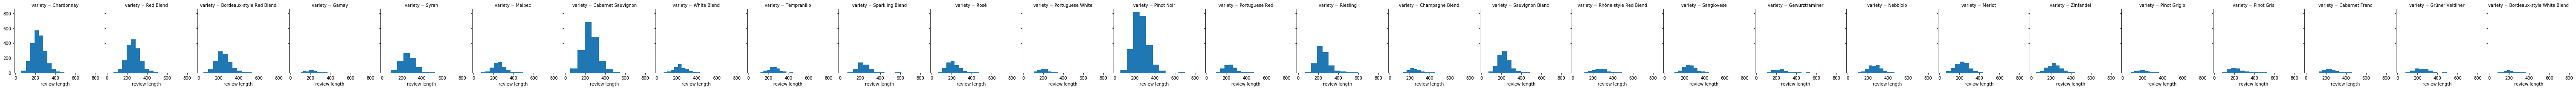

In [32]:
g = sns.FacetGrid(subset,col='variety')
g.map(plt.hist,'review length')

AVERAGE REVIEW LENGTH OF MOST OF THE WINE TYPES, SEEMS TO BE AROUND (200,300) WORDS.

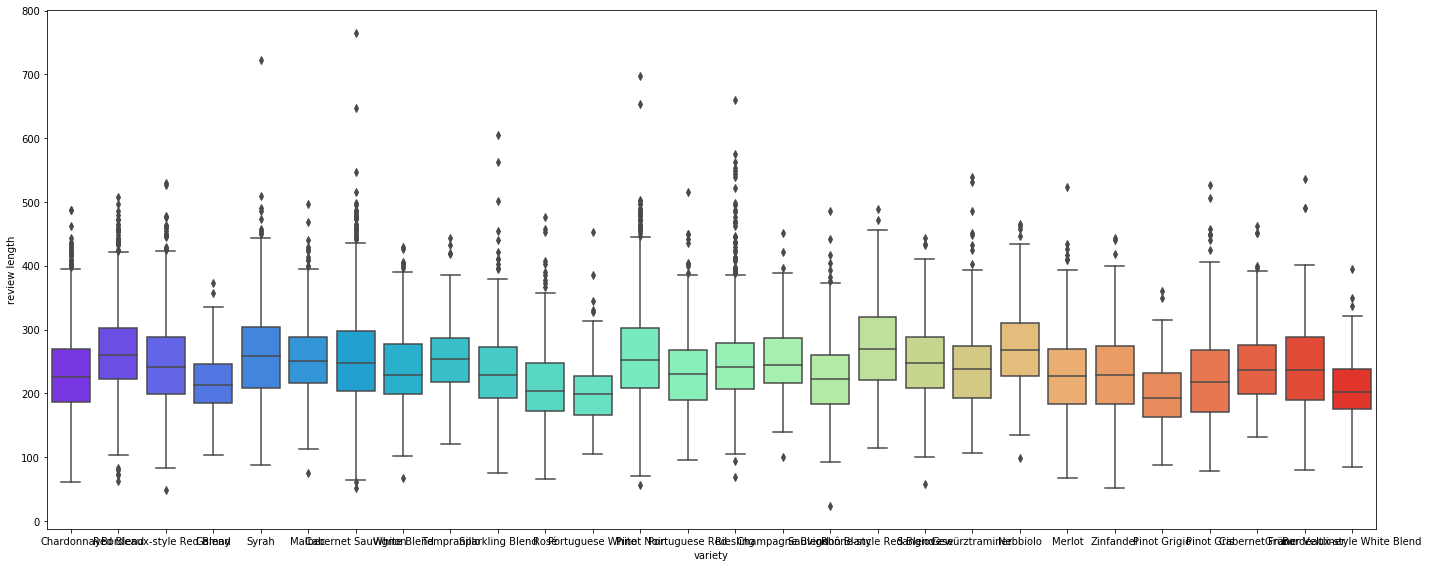

In [33]:
plt.figure(figsize = (20,8))
sns.boxplot(x='variety',y='review length',data=subset,palette='rainbow')
plt.tight_layout()

In [34]:
subset['review_description'].describe()

count                                                 18000
unique                                                18000
top       Towards the southern end of Chassagne, Morgeot...
freq                                                      1
Name: review_description, dtype: object

In [35]:
subset['review_description'].groupby(subset['variety']).describe()

,count,unique,top,freq
variety,,,,
Bordeaux-style Red Blend,1000,1000,"Impressively dense, dark flavored wine, very r...",1
Bordeaux-style White Blend,116,116,"This wine is still young, crisp and needs time...",1
Cabernet Franc,233,233,This beautiful vintage of Paleo (an oak-aged e...,1
Cabernet Sauvignon,1742,1742,Black currant and plum aromas come with a defi...,1
Champagne Blend,221,221,"This ripe, balanced and mature wine is ready t...",1
Chardonnay,2138,2138,"Towards the southern end of Chassagne, Morgeot...",1
Gamay,156,156,"Ripe and fruity, this is full of red cherry fr...",1
Gewürztraminer,165,165,From old vines planted on the Mayacamas Mounta...,1
Grüner Veltliner,218,218,Playful and nearly effervescent on the nose wi...,1


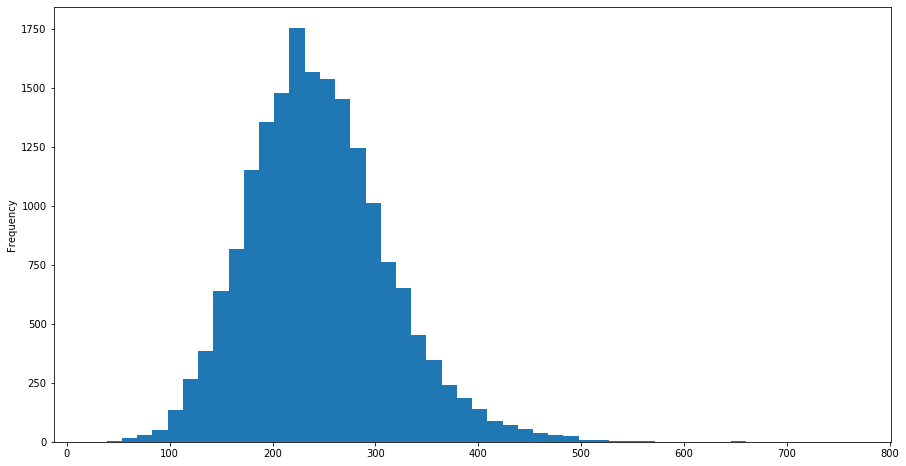

In [36]:
subset['review length'].plot(bins=50, kind='hist',figsize = (15,8)) 

In [37]:
subset['review length'].describe()

count    18000.000000
mean       244.972667
std         68.584455
min         24.000000
25%        198.000000
50%        240.000000
75%        286.000000
max        764.000000
Name: review length, dtype: float64

In [39]:
subset[subset['review length'] == 764]['review_description'].iloc[0]   #Showing the review with maximum length

"This very fine Cabernet wants a little time in the cellar. Right now, it's tight in tannins, with some acidic bitterness in the finish. The flavors are of black currants and smoky new oak. The Morisoli Vineyard has been home to very good, ageable bottlings from the likes of Sequoia Grove and Elyse, but in the last few years, Meander has expressed its terroir best. Try after 2012.This very fine Cabernet wants a little time in the cellar. Right now, it's tight in tannins, with some acidic bitterness in the finish. The flavors are of black currants and smoky new oak. The Morisoli Vineyard has been home to very good, ageable bottlings from the likes of Sequoia Grove and Elyse, but in the last few years, Meander has expressed its terroir best. Try after 2012."

CREATING A FUNCTION FOR TEXT PREPROCESSING 

In [19]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Remove all the numerical values
    4. Lemmatizing all the words
    5. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    nopunc =  [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    # Removing all the characters that are not alphabets
    nopunc =  [word for word in nopunc if word.isalpha()]
    
    # Lemmatizing all the words
    lemma = WordNetLemmatizer()
    return [lemma.lemmatize(w,"v") for w in nopunc]

In [41]:
subset.columns

Index(['country', 'review_description', 'points', 'price', 'variety',
       'review length'],
      dtype='object')

FIRST WE ARE TRAINING AND TESTING ON THE TRAINING DATASET TO CHECK THE ACCURACY LEVEL OF DIFFERENT ALGORITHMS AND THEN COMPARE WHICH ONE GIVES THE MOST ACCURATE ANSWERS.

In [20]:
from sklearn.model_selection import train_test_split

review_train, review_test, variety_train, variety_test = \
train_test_split(subset['review_description'], subset['variety'], test_size=0.2)

## 1. NAIVE BAYES ALGORITHM

In [43]:
from sklearn.pipeline import Pipeline

pipeline1 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [44]:
pipeline1.fit(review_train,variety_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x14A656F0>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [45]:
predictions1 = pipeline1.predict(review_test)

PRECISION: Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

RECALL: (Sensitivity)Recall is the ratio of correctly predicted positive observations to the all observations in actual class. The recall is intuitively the ability of the classifier to find all the positive samples.

F1-SCORE:  F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. 

SUPPORT:The support is the number of occurrences of each class in y_true


In [46]:
print(classification_report(variety_test,predictions1))

                            precision    recall  f1-score   support

  Bordeaux-style Red Blend       0.78      0.15      0.25       218
Bordeaux-style White Blend       0.00      0.00      0.00        33
            Cabernet Franc       0.00      0.00      0.00        46
        Cabernet Sauvignon       0.46      0.55      0.50       323
           Champagne Blend       0.00      0.00      0.00        50
                Chardonnay       0.38      0.96      0.54       426
                     Gamay       0.00      0.00      0.00        26
            Gewürztraminer       0.00      0.00      0.00        41
          Grüner Veltliner       0.00      0.00      0.00        42
                    Malbec       0.00      0.00      0.00        77
                    Merlot       0.00      0.00      0.00       101
                  Nebbiolo       1.00      0.01      0.02        88
              Pinot Grigio       0.00      0.00      0.00        48
                Pinot Gris       0.00      0.00

In [68]:
from sklearn import metrics

metrics.accuracy_score(variety_test, predictions1)
#metrics.confusion_matrix(variety_test, predictions1)

0.39111111111111113

## 2. LOGISTIC REGRESSION ALGORITHM

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline2 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ Logistic Regression classifier
])

In [22]:
pipeline2.fit(review_train,variety_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x127EDD68>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [23]:
predictions2 = pipeline2.predict(review_test)

In [24]:
print(classification_report(variety_test,predictions2))

                            precision    recall  f1-score   support

  Bordeaux-style Red Blend       0.58      0.62      0.60       194
Bordeaux-style White Blend       1.00      0.03      0.06        33
            Cabernet Franc       0.50      0.02      0.04        51
        Cabernet Sauvignon       0.47      0.77      0.58       327
           Champagne Blend       0.80      0.29      0.43        41
                Chardonnay       0.58      0.92      0.71       415
                     Gamay       1.00      0.15      0.26        33
            Gewürztraminer       1.00      0.09      0.17        33
          Grüner Veltliner       0.93      0.62      0.75        40
                    Malbec       0.78      0.32      0.46        96
                    Merlot       0.73      0.22      0.34       107
                  Nebbiolo       0.77      0.63      0.69        97
              Pinot Grigio       1.00      0.44      0.61        41
                Pinot Gris       0.62      0.13

In [25]:
from sklearn import metrics

metrics.accuracy_score(variety_test, predictions2)
#metrics.confusion_matrix(variety_test, predictions2)

0.6002777777777778

## 3. RANDOM FOREST ALGORITHM

In [53]:
from sklearn.ensemble import RandomForestClassifier

pipeline3 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier',RandomForestClassifier()),  # train on TF-IDF vectors w/ Random Forest classifier
])

C:\Users\Dell Insp\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [54]:
pipeline3.fit(review_train,variety_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x14A656F0>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [55]:
predictions3 = pipeline3.predict(review_test)

In [56]:
print(classification_report(variety_test,predictions3))

                            precision    recall  f1-score   support

  Bordeaux-style Red Blend       0.39      0.56      0.46       218
Bordeaux-style White Blend       0.40      0.06      0.11        33
            Cabernet Franc       0.07      0.02      0.03        46
        Cabernet Sauvignon       0.39      0.68      0.49       323
           Champagne Blend       0.58      0.22      0.32        50
                Chardonnay       0.45      0.87      0.60       426
                     Gamay       0.27      0.12      0.16        26
            Gewürztraminer       0.47      0.20      0.28        41
          Grüner Veltliner       0.44      0.19      0.27        42
                    Malbec       0.33      0.23      0.27        77
                    Merlot       0.35      0.29      0.32       101
                  Nebbiolo       0.53      0.40      0.45        88
              Pinot Grigio       0.68      0.27      0.39        48
                Pinot Gris       0.55      0.28

In [70]:
from sklearn import metrics

metrics.accuracy_score(variety_test, predictions3)
#metrics.confusion_matrix(variety_test, predictions3)

0.4658333333333333

## 4. Gradient Boosting 

In [39]:
from  sklearn.ensemble import GradientBoostingClassifier

pipeline4 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier',GradientBoostingClassifier()),  # train on TF-IDF vectors w/ Random Forest classifier
])

C:\Users\Dell Insp\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [40]:
pipeline4.fit(review_train,variety_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x127EDD68>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
...      presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False))])

In [41]:
predictions4 = pipeline4.predict(review_test)

In [42]:
print(classification_report(variety_test,predictions4))

                            precision    recall  f1-score   support

  Bordeaux-style Red Blend       0.50      0.52      0.51       194
Bordeaux-style White Blend       0.31      0.15      0.20        33
            Cabernet Franc       0.37      0.35      0.36        51
        Cabernet Sauvignon       0.52      0.66      0.58       327
           Champagne Blend       0.42      0.37      0.39        41
                Chardonnay       0.59      0.84      0.69       415
                     Gamay       0.37      0.33      0.35        33
            Gewürztraminer       0.49      0.52      0.50        33
          Grüner Veltliner       0.62      0.45      0.52        40
                    Malbec       0.55      0.43      0.48        96
                    Merlot       0.53      0.35      0.42       107
                  Nebbiolo       0.70      0.54      0.61        97
              Pinot Grigio       0.41      0.51      0.46        41
                Pinot Gris       0.41      0.34

In [43]:
metrics.accuracy_score(variety_test, predictions4)
#metrics.confusion_matrix(variety_test, predictions3)

0.5777777777777777

HERE I HAVE USED 4 ALGORITHMS WITH ALL DEFAULT PARAMETERS. PARAMETERS CAN BE ADJUSTED AS WELL ACCORDING TO THE REQUIREMENT AND DOCUMENTATION.

NOW, I WILL COMPARE THE ACCURACY RATE OF ALL THE FOUR ALGORITHMS AND CHOOSE THE ONE WITH HIGHEST ACCURACY AND APPLY THAT ON THE TEST DATASET.

Logistic regression gave us the highest accuracy of around 60%. So, we will use that to predict the values in the test dataset. The accuracy rate is not upto the mark but if we adjust some of the parameters of an algorithm then the accuracy rate can increase.

#### PREDICTING THE WINE TYPE ON THE TEST DATASET

In [26]:
test = pd.read_csv('test.csv')

In [27]:
test[test.duplicated('review_description',keep=False)].sort_values('review_description').shape

(630, 11)

In [28]:
test.drop_duplicates(inplace = True)

In [29]:
test.columns

Index(['user_name', 'country', 'review_title', 'review_description',
       'designation', 'points', 'price', 'province', 'region_1', 'region_2',
       'winery'],
      dtype='object')

DROPPING ALL THE COLUMNS THAT ARE NOT VERY USEFUL IN OUR ANALYSIS. WE ARE ONLY CONSIDERING PRICE, POINTS AND REVIEW DESCRIPTION COLUMNS FOR OUR ANALYSIS.

In [30]:
test.drop(['user_name','review_title','designation','province','region_1','region_2','winery'],axis=1,inplace=True)


DROPPING ALL THE NULL VALUES

In [31]:
test.isnull().sum()

country                  3
review_description       0
points                   0
price                 1374
dtype: int64

In [32]:
test.shape

(20351, 4)

In [33]:
test.dropna(inplace=True)

In [34]:
drop = ['Slovenia','Mexico','Moldova','Hungary','Turkey','Uruguay','Brazil','Lebanon','Morocco','Croatia','Ukraine','Georgia','Peru','Cyprus','Switzerland','Macedonia','Luxembourg','Serbia','Czech Republic','India']

In [35]:
subset_test = [~test['country'].isin(drop)]
subset_test = test.sample(5100)

In [36]:
predictions = pipeline2.predict(subset_test['review_description'])

In [37]:
pred = pd.DataFrame(predictions)

In [38]:
pred

,0
0,Cabernet Sauvignon
1,Pinot Noir
2,Pinot Noir
3,Chardonnay
4,Riesling
...,...
5095,Red Blend
5096,Rosé
5097,Chardonnay
5098,Cabernet Sauvignon
